# Predicting the Relationship Between Terry Stops and Race in Seattle, Washington

### *Pooja Bale, Caitlyn Ng, Louie Ortiz, Michael Navruzyan*

## **Research Question**

For our question, we wanted to ask: **“Can we predict how likely it is for an officer to stop a given suspected individual based on the suspect’s demographics, location, and the characteristics of the officer making the stop?”** We used characteristic features of the person stopped, such as their race, gender, age, and location they were stopped in (in relation to income level), as well as features of the officer making the stop. We wanted to see if any individual with particular characteristics in a certain part of Seattle, Washington is stopped more than individuals of other races or in other areas of the city.


## **Why Is This Important?**

This question is pressing, especially in our modern day and age, because there is undoubtedly perceived bias in police departments when patrolling marginalized races or less wealthy communities. We want to see how strong or polarized this bias may be (or if there truly is any bias at all). Since *Terry v. Ohio (1968)* confirmed the constitutionality of stop and frisks, racial profiling has been a big issue, and our goal is to determine whether or not these stops are harming minorities and/or low-income individuals disproportionately based on how well we can predict what suspect an officer will stop. Lower income areas have historically increased crime statistics due to larger minority populations in these regions, leading to often unjustified stops. In present day, we see in the media how these supposed "harmless" stops are causing people of color, particularly Black individuals, to lose their lives.

## **Data**

We will be looking at a stop and frisk (or Terry Stop) dataset from Seattle, Washington, ranging from the years 2015-2021. Here is the link to the [full dataset](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8).

The dataset includes information on officers' year of birth, race, and gender, which are features we will be looking at to see how likely an officer in Seattle is to stop an individual with specific demographics. The dataset also includes suspect demographics, such as perceived race, perceived gender, and age group. In addition, we find the precints/beats (location) in which the reported stop occured. Based on this information, it looks this Seattle Terry Stops dataset holds all the features that we were looking for in order to begin building our predictive models and explore our research question.


There is stop and frisk (or Terry stop) data made readily available on the internet by Seatle's local government. The data is already fairly clean and has columns pertaining to important features such as the perceived race, perceived gender, age of, location of the suspect, arrest flag, and frisk flag. To comply with our testing feature of a location's income level, we will have to replace the values for the location column to code each location as a rich or poor area of the city, based on either average annual income or average/median housing prices.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json
import urllib.request

In [ ]:
url = "https://data.seattle.gov/api/views/28ny-9ts8/rows.csv?accessType=DOWNLOAD&bom=true&format=true"
seattle = pd.read_csv(url)
seattle.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20180000375587,489414,Arrest,None,7679,1985,M,White,White,Male,2018-10-07T00:00:00,20:40:00,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,ONVIEW,WEST PCT 3RD W - DAVID BEATS,N,N,West,K,K2
1,36 - 45,-1,20180000376128,489332,Arrest,None,5845,1969,M,White,White,Male,2018-10-08T00:00:00,06:29:00,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,911,NORTH PCT 1ST W - B/N RELIEF (JOHN),N,N,North,J,J1
2,36 - 45,-1,20180000377520,489809,Arrest,None,7758,1987,M,White,Black or African American,Male,2018-10-09T00:00:00,09:23:00,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--NARCOTICS - OTHER,ONVIEW,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,E,E3
3,36 - 45,-1,20180000377580,490218,Arrest,None,7662,1988,M,White,Black or African American,Male,2018-10-09T00:00:00,12:40:00,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,WEST PCT 1ST W - KING/QUEEN,N,N,West,K,K1
4,36 - 45,-1,20180000377744,489698,Arrest,None,8384,1984,M,Black or African American,Asian,Female,2018-10-09T00:00:00,12:57:00,TRESPASS,--PROPERTY DEST (DAMG),911,EAST PCT 1ST W - GEORGE (CHARLIE),N,Y,East,C,C1


## **Exploratory Data Analysis**


While conducting our EDA, we initially removed any empty, unknown, or undetermined values in the dataset so each row had information we can work with. Because our question draws from intersecting identities and demographics such as race, gender, and age, we used our available dataset and broke down each category in relation to how we can answer if certain individuals face a Terry Stop more frequently in the Seattle area. Our dataset has a substantial level of granularity, which gives us the flexibility and creativity to create dataframes and other visualizations that appeal to our research question.

Our initial data contains **47392** values, but after cleaning, we are left with **31895** values.

Here is our cleaned dataset:

In [ ]:
#Cleaning data (DO NOT include data cleaning code in web presentation, if possible. Would
#just like to see visualizations)

index_race = seattle[seattle['Subject Perceived Race'] == '-'].index
index_race2 = seattle[seattle['Subject Perceived Race'] == 'Unknown'].index
seattle.drop(index_race, inplace=True)
seattle.drop(index_race2, inplace=True)

index_gender = seattle[seattle['Subject Perceived Gender']=='-'].index
index_gender2 = seattle[seattle['Subject Perceived Gender']=='Unable to Determine'].index
index_gender3 = seattle[seattle['Subject Perceived Gender']=='Unknown'].index
seattle.drop(index_gender, inplace=True)
seattle.drop(index_gender2, inplace=True)
seattle.drop(index_gender3, inplace=True)

index_age = seattle[seattle['Subject Age Group'] == '-'].index
seattle.drop(index_age, inplace=True)

index_precinct = seattle[seattle['Precinct'] == '-'].index
index_precinct2 = seattle[seattle['Precinct'] == 'Unknown'].index
index_precinct3 = seattle[seattle['Precinct'] == 'OOJ'].index
index_precinct4 = seattle[seattle['Precinct'] == 'FK ERROR'].index
seattle.drop(index_precinct, inplace=True)
seattle.drop(index_precinct2, inplace=True)
seattle.drop(index_precinct3, inplace=True)
seattle.drop(index_precinct4, inplace=True)
seattle['Precinct'] = seattle['Precinct'].replace(['SouthWest'], 'Southwest')

index_offgen = seattle[seattle['Officer Gender'] == 'N'].index
seattle.drop(index_offgen, inplace=True)

index_offrace = seattle[seattle['Officer Race']=='Not Specified'].index
index_offrace2 = seattle[seattle['Officer Race']=='Unknown'].index
seattle.drop(index_offrace, inplace=True)
seattle.drop(index_offrace2, inplace=True)

seattle = seattle[seattle['Officer YOB'] > 1945]

#Clean up strings in 'Beats' column

seattle['Beat'] = seattle['Beat'].str.rstrip()

seattle.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20180000375587,489414,Arrest,None,7679,1985,M,White,White,Male,2018-10-07T00:00:00,20:40:00,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,ONVIEW,WEST PCT 3RD W - DAVID BEATS,N,N,West,K,K2
1,36 - 45,-1,20180000376128,489332,Arrest,None,5845,1969,M,White,White,Male,2018-10-08T00:00:00,06:29:00,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,911,NORTH PCT 1ST W - B/N RELIEF (JOHN),N,N,North,J,J1
2,36 - 45,-1,20180000377520,489809,Arrest,None,7758,1987,M,White,Black or African American,Male,2018-10-09T00:00:00,09:23:00,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--NARCOTICS - OTHER,ONVIEW,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,E,E3
3,36 - 45,-1,20180000377580,490218,Arrest,None,7662,1988,M,White,Black or African American,Male,2018-10-09T00:00:00,12:40:00,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,WEST PCT 1ST W - KING/QUEEN,N,N,West,K,K1
4,36 - 45,-1,20180000377744,489698,Arrest,None,8384,1984,M,Black or African American,Asian,Female,2018-10-09T00:00:00,12:57:00,TRESPASS,--PROPERTY DEST (DAMG),911,EAST PCT 1ST W - GEORGE (CHARLIE),N,Y,East,C,C1


We will also be looking at the stop resolution, which details what happened at the end of each stop ('Arrest', 'Field Contact', 'Citation / Infraction', 'Offense Report', 'Referred for Prosecution'). Lastly, we will be looking at the beats/neighborhoods as our last feature to determine if wealthier locations impact whether a suspect was arrested or not.

The dataset also only focuses on Seattle, and therefore our results may not be generalizeable to other major cities. We also had to clean the data largely by removing NAs, unknowns, missing values, etc. Those missing values may have changed our interpretation and analysis, but because these values could skew our results, we needed to remove them so that we could have a more focused research question with clear data that can be interpreted and analyzed.

## **Descriptive Statistics and Visualizations**




First, we wanted to look at the trend of stops by year, as well as location, to get a general understanding of the data.

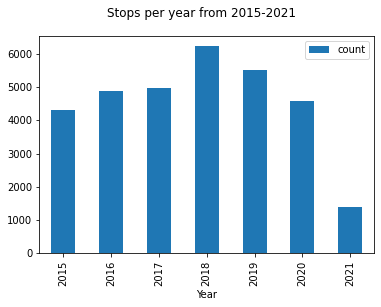

In [ ]:
seattle['Reported Date'] = pd.to_datetime(seattle['Reported Date'])
#extract only the year
seattle['Year'] = seattle['Reported Date'].dt.year

#count the number of occurences for each year
scount = seattle['Year'].value_counts().reset_index()
scount.columns = ['Year', 'count']
#plot in a bar graph
scount.sort_values('Year').plot.bar(x='Year', y='count')
plt.suptitle('Stops per year from 2015-2021');

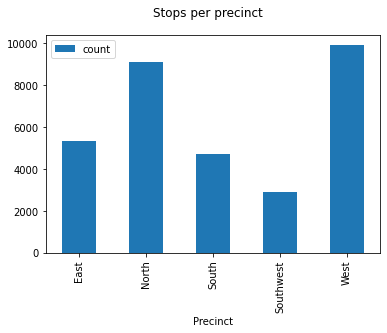

In [ ]:
#count the number of stops for each precinct
pcount = seattle['Precinct'].value_counts().reset_index()
pcount.columns = ['Precinct', 'count']
#plot in a bar graph
pcount.sort_values('Precinct').plot.bar(x='Precinct', y='count')
plt.suptitle('Stops per precinct');

From these visualizations, stops seem to be on a downward trend after peaking in 2018. The West precinct also seems to have the most stops, followed by North. This could be due to the income level of the different precints, which we will explore further in our modeling.

We also wanted to see the proportion of each race being arrested, to see if we can find any initial discrepancies or cases of discrimination.

In [ ]:
racecounts = seattle['Subject Perceived Race'].value_counts().reset_index()
racecounts.columns = ['Subject Perceived Race', 'count']
#convert count to proportion
racecounts['count'] = racecounts['count']/sum(racecounts['count'])
racecounts.columns = ['Subject Perceived Race', 'proportion']
racecounts

,Subject Perceived Race,proportion
0,White,0.535852
1,Black or African American,0.338141
2,Asian,0.036714
3,Hispanic,0.036620
4,American Indian or Alaska Native,0.031949
5,Multi-Racial,0.015614
6,Other,0.003480
7,Native Hawaiian or Other Pacific Islander,0.001630


From the above table, White subjects were stopped the most, followed by Black/African American subjects. The next highest proportion is Hispanic subjects, though there is a steep drop from 33.7% Black stops to only 3.7% Hispanic stops.

Interestingly, the racial composition of the city in 2016 was 65.7% White, 14.1% Asian, 7.0% Black, 0.4% Native American, 0.9% Pacific Islander, 2.3% from other races, and 5.6% from two or more races. 6.6% of the population is Hispanic or Latino of any race. 

However, **33.7% of the stops are of Black individuals, despite them making up only 7% of the city's population.**

Next, we wanted to look at the proportions of stop resolutions to see how many actually end up as arrests.

In [ ]:
stopcounts = seattle['Stop Resolution'].value_counts().reset_index()
stopcounts.columns = ['Stop Resolution', 'count']
#convert count to proportion
stopcounts['count'] = stopcounts['count']/sum(stopcounts['count'])
stopcounts.columns = ['Stop Resolution', 'proportion']
stopcounts

,Stop Resolution,proportion
0,Offense Report,0.417338
1,Arrest,0.320207
2,Field Contact,0.239003
3,Referred for Prosecution,0.020567
4,Citation / Infraction,0.002884


Offense reports seem to be the main type of stop resolution, followed by arrest. Arrests seem to make up quite a high percentage of stop resolutions, though they are not the most common.
Offense reports are the standard format for initial crime reports that are written up by a police officer responding to an incident.

Lastly, we'll be looking at the proportion of stops based on the suspect features of race, age group, and gender, as these are some of our main features. Below are two tables showing the proportion of each race with age group and each race with gender:

### *Race and Age Group*

In [ ]:
#race and age group
raceage = seattle.groupby(['Subject Perceived Race', 'Subject Age Group'])['Subject Age Group'].count().unstack('Subject Perceived Race').fillna(0)
raceage/len(seattle)

Subject Perceived Race,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Multi-Racial,Native Hawaiian or Other Pacific Islander,Other,White
Subject Age Group,,,,,,,,
1 - 17,0.001191,0.001285,0.025176,0.002634,0.001411,0.000063,0.000188,0.012949
18 - 25,0.005455,0.008277,0.076940,0.010472,0.005079,0.000408,0.001035,0.095250
26 - 35,0.010064,0.011318,0.106255,0.012290,0.005738,0.000470,0.001285,0.198244
36 - 45,0.009061,0.009280,0.065622,0.006992,0.002257,0.000502,0.000502,0.127230
46 - 55,0.004483,0.005016,0.044741,0.003543,0.000972,0.000094,0.000408,0.073773
56 and Above,0.001693,0.001536,0.019407,0.000690,0.000157,0.000094,0.000063,0.028406


### *Race and Gender*

In [ ]:
#race and gender
racegen = seattle.groupby(['Subject Perceived Race', 'Subject Perceived Gender'])['Subject Perceived Gender'].count().unstack('Subject Perceived Race').fillna(0)
racegen/len(seattle)

Subject Perceived Race,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Multi-Racial,Native Hawaiian or Other Pacific Islander,Other,White
Subject Perceived Gender,,,,,,,,
Female,0.010441,0.006992,0.058724,0.004703,0.004045,0.000345,0.001003,0.118263
Gender Diverse (gender non-conforming and/or transgender),0.000000,0.000000,0.000094,0.000000,0.000000,0.000000,0.000000,0.000031
Male,0.021508,0.029723,0.279323,0.031917,0.011569,0.001285,0.002477,0.417558


White subjects in the age group 26-35 are the most likely to be stopped, followed by white subjects in the age group 36-45 and Black subjects in the age group 26-35. 

In terms of gender, male subjects have higher proportions of being stopped than female subjects across almost all races. We also found that White males are the most likely to be stopped, followed by Black males. For females, White females are most likely to be stopped followed by Black females.

We also wanted to visualize the relationships between the officer demographics and the subject demographics. We decided to focus on officer race and year of birth and subject perceived race.

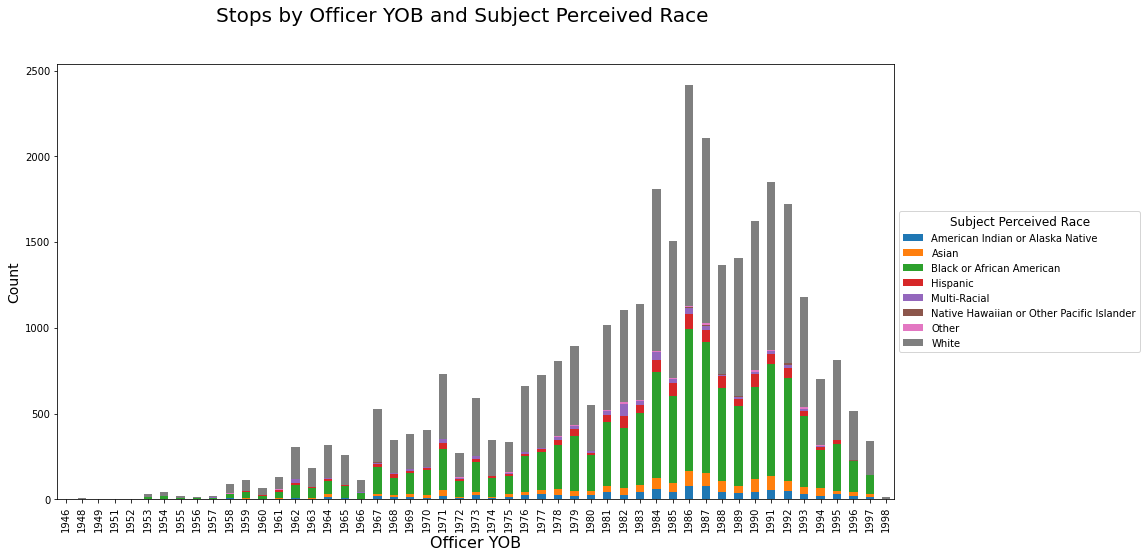

In [ ]:
#Officer year of birth vs subject perceived race
yob = seattle.groupby(['Subject Perceived Race', 'Officer YOB'])['Officer YOB'].count().unstack('Subject Perceived Race').fillna(0)
yob.plot(kind='bar', stacked=True, figsize = (15,8))
plt.legend(title="Subject Perceived Race", title_fontsize =12, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle('Stops by Officer YOB and Subject Perceived Race', fontsize=20);
plt.xlabel('Officer YOB', fontsize=16);
plt.ylabel('Count', fontsize=14);

Based on this bar chart and table of proportions, we found that officers who were born in **1984-1992** are conducting the most stops. Across these officers, they are also mostly pulling over White or Black or African American subjects.


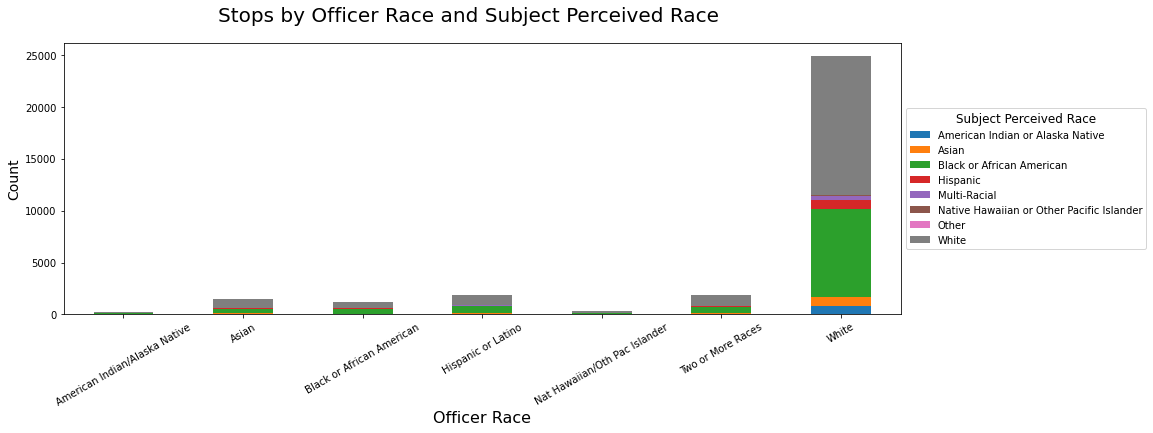

In [ ]:
#Officer race vs subject perceived race
races = seattle.groupby(['Subject Perceived Race', 'Officer Race'])['Officer Race'].count().unstack('Subject Perceived Race').fillna(0)
races.plot(kind='bar', stacked=True, figsize = (15,5))
plt.legend(title="Subject Perceived Race", title_fontsize = 12, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle('Stops by Officer Race and Subject Perceived Race', fontsize=20);
plt.xlabel('Officer Race', fontsize=16);
plt.ylabel('Count', fontsize=14);
plt.xticks(rotation=30);

Based on this bar chart and the table of proportions, officers of most races stopped mostly white subjects, followed by Black subjects. Interestingly, Black officers stopped almost the same proportion of white and Black subjects whereas **American Indian officers stopped more Black than White subjects.**


We also wanted to visualize how the number of the different stop resolutions has changed over the years, particularly to see if arrests increased.

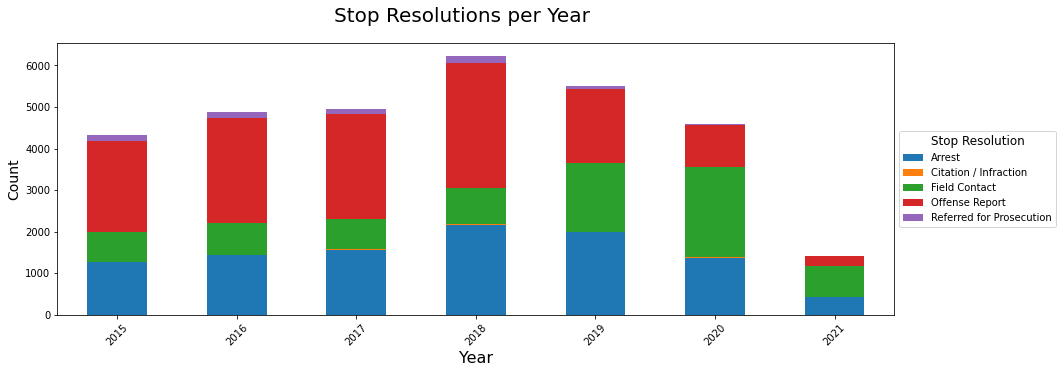

In [ ]:
#stacked barchart of stop resolutions per year
year = seattle.groupby(['Stop Resolution', 'Year'])['Year'].count().unstack('Stop Resolution').fillna(0)
year.plot(kind='bar', stacked=True, figsize = (15,5))
plt.legend(title="Stop Resolution", title_fontsize = 12, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle('Stop Resolutions per Year', fontsize=20);
plt.xlabel('Year', fontsize=16);
plt.ylabel('Count', fontsize=14);
plt.xticks(rotation=45);

From 2015-2020, it appears that a majority of the stop resolutions were either an Offense Report or an Arrest. The amount of stops that occurred seems to increase year by year up to 2018, then starts to decrease. Interestingly, it also looks like after 2018, the number of Citation/Infraction and Referred for Prosecution stop resolutions decrease until they are no longer common enough to show up on the graph. **Arrests and Field Contacts seem to make up larger proportions of stops as the years progress.**

Lastly, we wanted to look at the beats and where stops are concentrated among the 51 beats, which will prove useful later on when exploring the wealth of the beats.

In [ ]:
beats = seattle['Beat'].value_counts().reset_index()
beats.columns = ['Beat', 'count']

#create basemap
sea_coords = (47.61, -122.33)
seamap = folium.Map(sea_coords, zoom_start = 11)

#geojson of beats
url2 = 'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/spd-beats.geojson'
geodata = urllib.request.urlopen(url2).read()
output = json.loads(geodata)


folium.Choropleth(
    geo_data=url2,
    data=beats,
    columns=['Beat', 'count'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Stops",
).add_to(seamap)

folium.LayerControl().add_to(seamap)

folium.GeoJson(
    output).add_to(seamap)
seamap

In [ ]:
beats = seattle['Beat'].value_counts().reset_index()
beats.columns = ['Beat', 'count']
beats.head()

,Beat,count
0,K3,1457
1,N3,1314
2,E2,1239
3,M3,1205
4,M2,996


Beats K3 and N3 seem to have the highest concentration of stops. Most of the wealthy neighborhoods in Seattle are on the East side of the city, **which does not have a high concentration of stops**. As discovered earlier, the West and North precincts have the highest number of stops, which corresponds with this map as well.

## **Modeling**

For our modeling procedure we decided to experiment with logistic regression and ridge regression. In adherence with our initial research question, we are attempting to predict the chance of an officer stopping an individual based on the suspect and officer's characteristics. Using both categorical and numerical data as features, we are able to grasp an understanding of how our model can predict a suspect's race. Classification models help best facilitate understanding our question, as well as being able to successfully convert certain features in our dataset to binary form to be able to utilize both regression's properties.

From our EDA above, we see that there may be some discrimination based on city demographics and stop demographics.

We decided to use logstic regression for our research question which is to predict the chance of an officer making a stop based on a suspect's characteristics. Since logistic regression is a classification procedure that predicts the probaility of a certain event occuring, this process aligns smoothly with what we are looking for.

We also ran a second model using ridge regression, which helps minimize variance by adding a penalty which constraints high coefficients. This kind of model also helps make closer estimations to our true values given in the dataset.

Some of the features we considered include:

 
* **Stop Resolution**
* **Officer YOB**
* **Subject Age Group**
* **Beat Wealth binary**
* **Officer Gender**
* **Subject Gender**

We did not consider time and date as we wanted to focus more on the demographics.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

To ensure our data is able to be fed into a logistic regression model, we had to translate some of the data into binary format. First, we took the 'Beat' column and added a new column called 'Wealth' that identifies **whether the stop location was considered a wealthy part of Seattle (1) or not (0)**.

We used [this source](https://www.homesnacks.com/richest-neighborhoods-in-seattle/) of the richest neighborhoods in Seattle and cross checked them with the geojson map from the EDA to determine which beats were considered wealthy. We also used a cutoff of $100,000 as it is the median annual income for the city, found [here](https://www.seattletimes.com/seattle-news/data/seattles-median-income-soars-past-100000-but-wealth-doesnt-reach-all/).

In [ ]:
#code the beats as wealthy or not wealthy based on income level (0 = not wealthy, 1 = wealthy)
seattle['Wealth'] = np.linspace(start=0, stop=0, num=len(seattle))

wealthy = ['J1', 'C1', 'L3', 'U3', 'C3', 'G3', 'Q1', 'Q2', 'W3', 'C2', 'J3']

for i in wealthy:
  seattle.loc[seattle['Beat'] == i, 'Wealth'] = 1

seattle[['Beat', 'Wealth']].head()

,Beat,Wealth
0,K2,0.0
1,J1,1.0
2,E3,0.0
3,K1,0.0
4,C1,1.0


We also coded the subject perceived race as a binary column, as this is our dependent variable. **We classified white suspects as 1 and non-white suspects/POC as 0.**

We also converted the officer gender column to a binary as well, as the string values originally in the column won't run in a logistic regression model.

In [ ]:
#code the subject races as 'white' (1) or 'non-white' (0)
seattle['Subject Race Code'] = (seattle['Subject Perceived Race'] == 'White').astype(int)

#code the Officer Gender as 'M' (0) or 'F' (1)
seattle['Officer Gender Code'] = (seattle['Officer Gender'] == 'M').astype(int)

seattle[['Subject Perceived Race', 'Subject Race Code', 'Officer Gender', 'Officer Gender Code']].head()

,Subject Perceived Race,Subject Race Code,Officer Gender,Officer Gender Code
0,White,1,M,1
1,White,1,M,1
2,Black or African American,0,M,1
3,Black or African American,0,M,1
4,Asian,0,M,1


Next, in order to run the model, we coded dummy variables for the subject age groups, stop resolutions, officer races, and subject genders, as these columns had more than two unique values.

The subject age group '1-17', stop resolution 'Arrest', officer race 'Native American/Indian/Alaska Native', and subject perceived gender 'F' are reflected in the intercept term, since we have dropped the first of the unique values in each of these columns.

In [ ]:
#creating dummies for all subject age groups
age_group_dummies = pd.get_dummies(seattle['Subject Age Group'], drop_first= True)
seattle = seattle.join(age_group_dummies)

#creating dummies for all stop resolutions
stop_resolution_dummies = pd.get_dummies(seattle['Stop Resolution'], drop_first= True)
seattle = seattle.join(stop_resolution_dummies)

#creating dummies for all officer races
officer_race_dummies = pd.get_dummies(seattle['Officer Race'], drop_first= True)
seattle = seattle.join(officer_race_dummies)

#creating dummies for all subject genders
subject_gender_dummies = pd.get_dummies(seattle['Subject Perceived Gender'], drop_first= True)
seattle = seattle.join(subject_gender_dummies)

A correlation matrix helps us see which columns are most highly correlated with the 'Subject Race Code' column, our dependent variable.

While 'Subject ID', 'GO/SC Num', and 'Terry Stop ID' look to have higher correlations, these columns do not provide us any substantial information and were thus not included in the features.

In [ ]:
#correlation matrix
corrmat = seattle.corr()
corrmat

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB,Year,Wealth,Subject Race Code,Officer Gender Code,18 - 25,26 - 35,36 - 45,46 - 55,56 and Above,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution,Asian,Black or African American,Hispanic or Latino,Nat Hawaiian/Oth Pac Islander,Two or More Races,White,Gender Diverse (gender non-conforming and/or transgender),Male
Subject ID,1.000000,0.719302,0.912321,0.243538,0.721165,-0.012569,0.050907,-0.045296,-0.057719,0.000220,0.046804,0.021361,0.042238,0.001548,0.321015,-0.248541,-0.084373,0.031437,0.004678,0.052595,-0.015615,0.063520,-0.074104,0.022189,0.033770
GO / SC Num,0.719302,1.000000,0.772202,0.317151,0.996410,0.006887,0.052360,-0.020720,-0.091554,0.023483,0.058311,0.025387,0.043371,0.000432,0.249584,-0.213215,-0.070641,0.052012,-0.010415,0.062650,-0.025295,0.066734,-0.077857,0.014580,0.031394
Terry Stop ID,0.912321,0.772202,1.000000,0.262460,0.774697,-0.011713,0.044277,-0.045483,-0.079102,0.000528,0.058862,0.034472,0.048414,0.000944,0.331517,-0.257706,-0.086073,0.038151,0.003380,0.054553,-0.019397,0.065916,-0.078357,0.016558,0.040240
Officer YOB,0.243538,0.317151,0.262460,1.000000,0.318612,-0.017207,-0.020884,-0.078946,-0.020677,-0.003411,0.021886,-0.002434,0.024019,0.004651,0.072329,-0.117919,-0.039488,-0.016289,-0.051568,0.041290,-0.041971,0.131394,-0.042551,0.002990,0.011952
Year,0.721165,0.996410,0.774697,0.318612,1.000000,0.007070,0.053015,-0.019987,-0.093152,0.023303,0.059713,0.026146,0.044182,0.000131,0.248337,-0.217037,-0.071770,0.051779,-0.011009,0.063982,-0.024658,0.066451,-0.078105,0.014582,0.030967
Wealth,-0.012569,0.006887,-0.011713,-0.017207,0.007070,1.000000,0.036335,0.001135,-0.002655,-0.015186,0.005242,0.000699,-0.002822,0.003018,0.002526,-0.001358,0.010050,0.011946,0.013140,0.027980,0.008183,0.003307,-0.029991,0.003407,-0.015119
Subject Race Code,0.050907,0.052360,0.044277,-0.020884,0.053015,0.036335,1.000000,-0.003366,-0.067223,0.054889,0.041376,0.014695,0.004666,-0.006211,0.050444,-0.012204,0.008186,0.014108,-0.019831,-0.006037,-0.002140,0.013352,0.004419,-0.006419,-0.042930
Officer Gender Code,-0.045296,-0.020720,-0.045483,-0.078946,-0.019987,0.001135,-0.003366,1.000000,0.001509,0.006633,0.002402,-0.009718,-0.001318,-0.002912,-0.040473,0.014212,0.008580,0.048179,0.001005,0.025375,0.034887,-0.119638,0.016040,0.004003,0.012416
18 - 25,-0.057719,-0.091554,-0.079102,-0.020677,-0.093152,-0.002655,-0.067223,0.001509,1.000000,-0.366719,-0.269088,-0.197642,-0.118224,0.009204,-0.039819,0.028929,0.016966,-0.002336,0.000615,-0.011730,0.007194,-0.018784,0.012743,0.008273,-0.054409
26 - 35,0.000220,0.023483,0.000528,-0.003411,0.023303,-0.015186,0.054889,0.006633,-0.366719,1.000000,-0.387630,-0.284709,-0.170305,-0.015736,-0.012368,-0.012320,-0.009177,-0.013353,0.001109,-0.002497,0.004060,-0.003349,0.008921,0.003634,-0.009615


Since we have a large amount of variables due to the dummy creations, we used a function to rank the top 20 features that correlate the highest with the 'Subject Race Code' column. This confirms what we saw in the correlation matrix.

In [ ]:
#getting top correlations with dependent var (Subject race code) in order to see some features of interest
top_correlations_with_dependent_var =pd.DataFrame(corrmat.apply(lambda x:list(corrmat.columns[np.array(x).argsort()[::-1][:20]]), axis=1).to_list(),  columns=['rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9', 'rank10', 'rank11', 'rank12', 'rank13', 'rank14', 'rank15', 'rank16', 'rank17', 'rank18', 'rank19', 'rank20']).iloc[[5]]

top_correlations_with_dependent_var


,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,rank11,rank12,rank13,rank14,rank15,rank16,rank17,rank18,rank19,rank20
5,Wealth,Subject Race Code,Hispanic or Latino,Black or African American,Asian,Referred for Prosecution,Nat Hawaiian/Oth Pac Islander,Year,GO / SC Num,36 - 45,Gender Diverse (gender non-conforming and/or t...,Two or More Races,Citation / Infraction,Field Contact,Officer Gender Code,46 - 55,Offense Report,18 - 25,56 and Above,Terry Stop ID


At first, we tested on just the 20 features, but received relatively low model accuracies. We decided to use more than just the 20 features in order to improve our score.

The dataset will be split into a training, validation, and test set, as per the standard split of 60-20-20 to ensure there is enough data in each section.

* Training set 60%
* Validation set 20%
* Test set 20%

In [ ]:
#independent and dependent variables
X = seattle[['Officer YOB', 'Wealth', 'Officer Gender Code', '18 - 25', '26 - 35','36 - 45', '46 - 55', '56 and Above', 'Citation / Infraction','Field Contact', 'Offense Report', 'Referred for Prosecution', 'Asian','Black or African American', 'Hispanic or Latino','Nat Hawaiian/Oth Pac Islander', 'Two or More Races', 'White','Gender Diverse (gender non-conforming and/or transgender)', 'Male']]

y = seattle['Subject Race Code']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = .80,
                                                   test_size = .20)

# Train/Validation Split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                           train_size = .75,
                                                           test_size = .25)

### *Logistic Regression*

In [ ]:
#fit logistic model
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train, y_train)
log_pred = log_model.predict(X_train)
pd.Series(log_pred).value_counts()

1    14018
0     5119
dtype: int64

In [ ]:
#look at predicted probabilities for each observation
log_model.predict_proba(X_train)

array([[0.34307854, 0.65692146],
       [0.55590584, 0.44409416],
       [0.41994106, 0.58005894],
       ...,
       [0.34836569, 0.65163431],
       [0.44722722, 0.55277278],
       [0.48416865, 0.51583135]])

The logistic model predicts about 75% of subjects to be white.

The first value in each list is the probability that the suspect race is a 0 (POC) and the second value is the probability that the suspect race is a 1 (white), as predicted by our model. For example, if second element in array is greater than 0.5, the model is predicting for that observations subject race code to be white (1).

In [ ]:
#logistic model r squared on the validation set
log_model.score(X_validate, y_validate)

0.5665464806395987

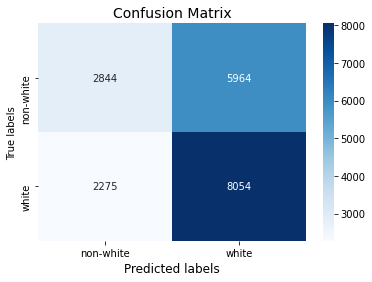

In [ ]:
#plot confusion matrix to get a nice visual of false negatives, false positives, and correct predictions for the logistic model
labels = [0, 1]
log_confusion_matrix = confusion_matrix(y_train, log_pred, labels)
ax= plt.subplot()
sn.heatmap(log_confusion_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');

ax.set_xlabel('Predicted labels',fontsize=12);ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix', fontsize=14); 
ax.xaxis.set_ticklabels(['non-white', 'white']); ax.yaxis.set_ticklabels(['non-white', 'white']);

### *Ridge Regression*

In [ ]:
#fit ridge model
ridge_reg = RidgeClassifier()
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_train)
pd.Series(ridge_pred).value_counts()

1    15007
0     4130
dtype: int64

The Ridge model predicts a slightly higher percentage of subjects as white.

Since the Ridge Classifier is a model with a regularization term, it is slightly better than our logistic model.

We lastly tested both models on our test set.

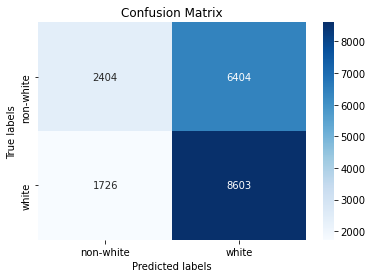

In [ ]:
#plot confusion matrix to get a nice visual of false negatives, false positives, and correct predictions for the ridge model
labels = [0, 1]
ridge_confusion_matrix = confusion_matrix(y_train, ridge_pred)
ax= plt.subplot()
sn.heatmap(ridge_confusion_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-white', 'white']); ax.yaxis.set_ticklabels(['non-white', 'white']);

In [ ]:
#r squared on the validation set for ridge model
ridge_model.score(X_validate, y_validate)

0.5737576422636776

## **Results**

In [ ]:
log_model.score(X_test, y_test)

0.5627841354444271

In [ ]:
ridge_model.score(X_test, y_test)

0.5645085436588807

Again, the ridge model does slightly better on the test set than logistic model. Unsurprisingly, our respective accuracies for each model are lower on their test sets than their validation sets.

Since the accuracy score was essentially the same on our test sets (as expected, slightly lower) compared the validation sets, hopefully indicating good generalization abilities.


## **Conclusions**

The results shown through our modeling indicate that our model is decently accurate at predicting the stop of a White subject in Seattle based on the features we have chosen. Even though it is not super accurate, when considering from a broader perspective, the model is better than randomly guessing a subject's race since we get an accuracy of about 55% in both the logistic model and the ridge model.

Looking at the confusion matrices for the logistic and ridge models, we see that the predicted and true labels for White suspects is the highest, indicating that our model was fairly accurate when predicting whether a suspect being pulled over would be White. However, when looking at the non-White suspects, our model classifies many of the non-White subjects being pulled over as White. We see this in the confusion matrices for both the logistic and ridge models. This may be because there is a large amount of White subject data in our dataset, therefore when training on this data, the model may be falsely classifying more non-White subjects as White. 

If our training set is dominated by mostly white subjects, which looks to be the case, we cannot expect great results when trying to apply our model that we trained on the white dominated dataset to predict non-white subjects too. We also see that the accuracy for predicted non-White labels and true non-White labels is also fairly low. Overall, this data shows us that the model is fairly accurate at predicting whether stops for White subjects, but for non-White subjects, this is not the case. 

To answer our question, we can predict with a somewhat low accuracy whether an officer will stop a white or non-white individual, but we are not able to properly determine whether there is true discrimination or not. 

To solve this in the future, we may use different models such as the Naive Bayes classifier, which assumes strong independence between the features (which can help if there is not as much correlation between variables), or a more expansive dataset which can provide more data points, as the Seattle dataset is updated regularly.

The accuracy of our models are still relatively low compared to what would be ideal to see if there was actually any discrimination or not, despite having an accuracy of just over 50%. This can be attributed to a number of reasons, such as our choice of models, the weights of features (or the features themselves, as we did not use time and date), or simply that the correlations between the features and our dependent variable are not high enough.

While adding more than 20 features did increase our model accuracy slightly, it was not a significant enough improvement. It is possible that there may be little to no discrimination based on the dataset that our model was able to pick up. Since our models predicted roughly three times as many white subjects as non-white, which, based on our EDA regarding races in stops and city demographics, is not consistent with the dataset proportions or the demographic proportions.

## **Improvements**

*   **Oversampling:** Our dataset has a much larger representation of White subjects compared to non-White subjects. This could have affected our model since it was more accurate in predicting whether a White subject would be stopped, but was inaccurate in predicting whether a non-White subject would be stopped. To address this, we could use oversampling in which we randomly duplicate more rows with non-White subjects so that when we train our model on the data, it has more non-White data to work with. This could help in improving the accuracy of the model, but it’s important to make sure that the oversampling is done correctly otherwise there could be many other problems that arise, such as overfitting.
*   **City Demographics:** If our data had census tract information along with beat information, we would have more features that may be more highly correlated with race in the stops, especially based on what we found in the EDA regarding Seattle's racial demographic percentages compared to the dataset's racial demographic percentages.
*   **Null Values:** We removed quite a bit of null values, which could have held important information or patterns that were not included in our modeling. Also since this dataset was not extremely large in the first place and we dropped a considerable amount of rows, we may have altered the data more than we expected to by removing all rows with null values. 



## **Implications**

The amount of legal and policy data that is available to us gives us an extremely useful tool to navigate different types of legal issues we see in society today. For our project, we have used this data to understand different correlations or implications of the intersection between Terry stops and demographic background. This data can be useful in uncovering the injustices that are inherently bred into American law, but it’s also important to note the nuanced details that data science can sometimes miss. The social, contextual, and ethical factors that play a role in data science can sometimes be misconstrued or devalued when using it as a tool to understand legal and social issues. Therefore, it is imperative that we not only use data to inform our decisions and policies, but also to use societal factors and contextual information to inform the data that we are analyzing.

There are obviously many issues that have been brought to the surface in society, whether it relates to race, social status, or income. Data helps us understand subtle correlations that arise when looking into these issues. But there can also be many issues in data collection and sourcing where the data misses key concepts and social practices. In our project, we look at the data on Terry stops and how racial background can affect who is pulled over or who is pulling over who. But when looking at the categories and numerical indicators of these suspects and officers, we don’t get insight into the context of each situation, the dynamics between the officer and subject, or the history and background of each person. Data misses many of these points, so ethically it can be difficult to critically conclude that an officer’s race will affect who they stop or a subject’s race will affect whether they are stopped or not.

These implications point to the fact that policy must be informed by both data and social factors. Both sides lack crucial information in determining the full extent of different situations. On one hand, data is extremely useful in helping us navigate different dynamics and correlations in legal policies. On the other hand, social and contextual factors help us deeply understand the implications behind how these legal policies are enacted, and this information can be missed in data. Future research must address that data science can provide incredible insights, but it must also be socially informed.


## **Future Areas of Research**

Based on the research and analysis we have done, we’ve found that discrimination may not be a large factor in Seattle when officers are stopping suspects. We found that a majority of suspects being stopped were White, followed by African American. This may be due to the population composition of Seattle, but overall there seems to be little discrimination in this stop data. However, one interesting factor we discovered was that **only 7% of Seattle’s population consisted of African American people, yet African Americans made up around 34% of the Terry stops and were the second most likely ethnic group to be pulled over.**

These findings incite the question of whether other factors are playing a role in the conduction of terry stop in Seattle. Future research could look at the intersection of race and other factors (such as income, social status, etc.) and how the combination of factors may be affecting whether or not a suspect is stopped. It would also be interesting to look into how timing may affect stops. For example, it could be very possible that current events have a large impact on whether officers will pull over a suspect and the frequency of stops based on race or other factors could increase or decrease based on the current events. Overall, **future research should consider looking into the duality of race and other factors and how it affects the conduction of terry stops** as well as contextual and social factors that may influence the frequency of Terry stops.
